# Text Extractor from Image 

#### Import the required libraries

In [1]:
import cv2
import pytesseract
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

#### Path to the Tesseract executable

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\krish\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

#### Initialize EasyOCR reader

In [3]:
reader = easyocr.Reader(['en'])  # Specify language as 'en' for English

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


#### Image processing and text extraction

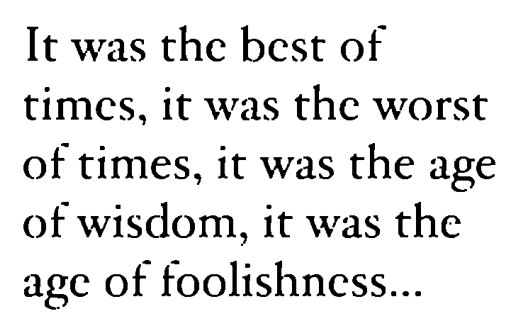

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...



In [4]:
def enhance_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    denoised = cv2.bilateralFilter(gray, 5, 75, 75)
    
    thresh = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)
    
    return closing

def extract_text_from_image(image_path):
    image = cv2.imread(image_path)
    
    enhanced_image = enhance_image(image)
    
    cv2.imwrite('enhanced image.png', enhanced_image)
    
    extracted_text = pytesseract.image_to_string(enhanced_image)
    
    plt.imshow(enhanced_image, cmap='gray')
    plt.axis('off')
    plt.show()
    
    return extracted_text

if __name__ == "__main__":
    image_path = r"C:\Users\krish\OneDrive\Desktop\Projects\Text Extractor from Image\image.png"
    extracted_text = extract_text_from_image(image_path)

    print(extracted_text)